In [1]:
import numpy as np
import tikzplotlib
import matplotlib.pyplot as plt
import torch
from torch import tensor

In [2]:
# Fix for matplotlib legend
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

### Creating plot of demand and supply functions

In [3]:
sigma = 0.5
def flux(rho):
    return rho * (1. - rho)

fmax = flux(sigma)

def D(rho):
    if rho <= sigma:
        return flux(rho)
    else:
        return fmax

def S(rho):
    if rho <= sigma:
        return fmax
    else:
        return flux(rho)

In [4]:
densities = np.linspace(0, 1, 101)
demand = np.array([D(d) for d in densities])
supply = np.array([S(d) for d in densities])

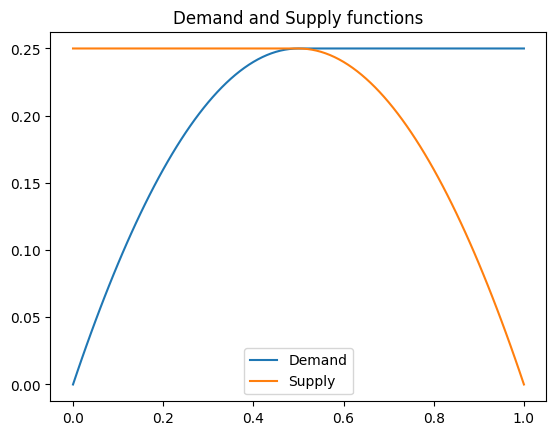

In [9]:
# Creating plot
fig = plt.figure()

plt.plot(densities, demand, label = "Demand")
plt.plot(densities, supply, label = "Supply")

plt.title("Demand and Supply functions")
plt.legend()

# Fixing issue with legend
tikzplotlib_fix_ncols(fig)

# Saving as tikz figure
tikzplotlib.save("../figurer/demand_supply.tex")

### Creating plot of Logistic function

In [10]:
def jump(x, start):
    return torch.sigmoid(x - (start + 5)) # Plus 5 to shift start of sigmoid to start

def derivative(x, start):
    return jump(x, start) * (1 - jump(x, start))

In [11]:
x = torch.linspace(-10, 10, 100)
center = -5

y = jump(x, center)
y2 = derivative(x, center)

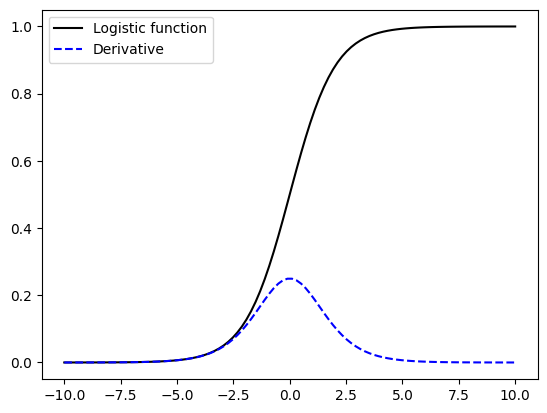

In [15]:
# Creating plot
fig = plt.figure()

plt.plot(x, y, 'k', label = 'Logistic function')
plt.plot(x, y2, 'b', linestyle = "dashed", label = 'Derivative')


# plt.title("Logistic Function")

# Fixing issue with legend
# tikzplotlib_fix_ncols(fig)

# Saving as tikz figure
plt.legend()
# plt.show()
tikzplotlib.save("../figurer/logistic.tex")


### 1-1 traffic light

In [71]:
{# parameters = [torch.tensor([50., 50., 50., 50.]), 
#               torch.tensor([50.0000, 50.0000, 48.0986, 40.0000]), 
#               torch.tensor([50.0000, 50.0000, 46.1651, 30.0000]), 
#               torch.tensor([50.0000, 50.0000, 43.8349, 20.0000]), 
#               torch.tensor([50.0000, 50.0000, 40.6673, 10.0000]), 
#               torch.tensor([50.0000, 50.0000, 39.4173, 10.0000]), 
#               torch.tensor([50.0000, 50.0000, 39.4173, 10.0000])]

# objective_vals = [torch.tensor(4873.7910), torch.tensor(4600.8516), 
#                   torch.tensor(4229.7207), torch.tensor(3824.8748), 
#                   torch.tensor(3165.5415), torch.tensor(3158.1887), 
#                   torch.tensor(3158.1887)]


# parameters2 = [torch.tensor([50., 50., 70., 70.]), 
#                torch.tensor([50.0000, 50.0000, 68.1841, 60.0000]), 
#                torch.tensor([50.0000, 50.0000, 66.2153, 50.0000]), 
#                torch.tensor([50.0000, 50.0000, 64.0772, 40.0000]), 
#                torch.tensor([50.0000, 50.0000, 62.5880, 30.0000]), 
#                torch.tensor([50.0000, 50.0000, 60.1146, 20.0000]), 
#                torch.tensor([50.0000, 50.0000, 59.8058, 10.0000]), 
#                torch.tensor([50.0000, 50.0000, 59.1808, 10.0000])]

# objective_vals2 = [torch.tensor(4853.4873), torch.tensor(4666.5249), 
#                    torch.tensor(4446.4121), torch.tensor(4179.1567), 
#                    torch.tensor(3816.2793), torch.tensor(3410.1038), 
#                    torch.tensor(2803.1580), torch.tensor(2797.0579)]


# parameters3 = [torch.tensor([50., 50., 80., 80.]), 
#                torch.tensor([50.0000, 50.0000, 78.6224, 70.0000]), 
#                torch.tensor([50.0000, 50.0000, 76.8091, 60.0000]), 
#                torch.tensor([50.0000, 50.0000, 75.1235, 50.0000]), 
#                torch.tensor([50.0000, 50.0000, 73.2263, 40.0000]), 
#                torch.tensor([50.0000, 50.0000, 70.8332, 30.0000]), 
#                torch.tensor([50.0000, 50.0000, 68.1285, 20.0000]), 
#                torch.tensor([50.0000, 50.0000, 67.6666, 10.0000]), 
#                torch.tensor([50.0000, 50.0000, 67.6666, 10.0000])]

# objective_vals3 = [torch.tensor(4844.9897), torch.tensor(4678.1304), 
#                     torch.tensor(4484.6367), torch.tensor(4259.3008), 
#                     torch.tensor(3994.2937), torch.tensor(3682.6494), 
#                     torch.tensor(3259.6060), torch.tensor(2714.5117), 
#                     torch.tensor(2714.5117)]

# parameters4 = [torch.tensor([50., 50., 90., 90.]), 
#                torch.tensor([50.0000, 50.0000, 89.3607, 80.0000]), 
#                torch.tensor([50.0000, 50.0000, 87.1587, 70.0000]), 
#                torch.tensor([50.0000, 50.0000, 85.5029, 60.0000]), 
#                torch.tensor([50.0000, 50.0000, 83.4817, 50.0000]), 
#                torch.tensor([50.0000, 50.0000, 81.1284, 40.0000]), 
#                torch.tensor([50.0000, 50.0000, 79.6416, 30.0000]), 
#                torch.tensor([50.0000, 50.0000, 76.7734, 20.0000]), 
#                torch.tensor([50.0000, 50.0000, 73.6731, 10.0000]), 
#                torch.tensor([50.0000, 50.0000, 72.4231, 10.0000]), 
#                torch.tensor([50.0000, 50.0000, 72.4231, 10.0000])]


# objective_vals4 = [torch.tensor(4838.4595), torch.tensor(4675.2256), 
#                    torch.tensor(4516.8716), torch.tensor(4329.2681), 
#                    torch.tensor(4110.1348), torch.tensor(3854.0776), 
#                    torch.tensor(3536.3684), torch.tensor(3135.9751), 
#                    torch.tensor(2669.2761), torch.tensor(2663.5117), 
#                    torch.tensor(2663.5117)]

# # Previous from non-int optimization approach

# parameters5 = [torch.tensor([50., 50., 80., 10.]), 
#                torch.tensor([50., 50., 90., 10.]), 
#                torch.tensor([ 50.,  50., 100.,  10.]), 
#                torch.tensor([ 50.,  50., 110.,  10.]), 
#                torch.tensor([ 50.,  50., 120.,  10.]), 
#                torch.tensor([ 50.,  50., 120.,  10.])]


# objective_vals5 = [torch.tensor(2611.0215), torch.tensor(2550.8123), 
#                    torch.tensor(2498.7100), torch.tensor(2450.0947), 
#                    torch.tensor(2411.4329), torch.tensor(2411.4329)]

# parameters6 = [torch.tensor([50., 50., 80., 20.]), 
#                torch.tensor([50., 50., 79., 10.]), 
#                torch.tensor([50., 50., 89., 10.]), 
#                torch.tensor([50., 50., 99., 10.]), 
#                torch.tensor([ 50.,  50., 109.,  10.]), 
#                torch.tensor([ 50.,  50., 119.,  10.]), 
#                torch.tensor([ 50.,  50., 120.,  10.]),
#                torch.tensor([ 50.,  50., 120.,  10.])]

# objective_vals6 = [torch.tensor(3105.0203), torch.tensor(2620.7122), 
#                    torch.tensor(2554.9004), torch.tensor(2496.3462), 
#                    torch.tensor(2457.1792), torch.tensor(2419.8198), 
#                    torch.tensor(2411.4329), torch.tensor(2411.4329)]

# parameters7 = [torch.tensor([50., 50., 80., 80.]), torch.tensor([50., 50., 78., 70.]), 
#                torch.tensor([50., 50., 76., 60.]), torch.tensor([50., 50., 74., 50.]), 
#                torch.tensor([50., 50., 72., 40.]), torch.tensor([50., 50., 70., 30.]), 
#                torch.tensor([50., 50., 69., 20.]), torch.tensor([50., 50., 68., 10.]), 
#                torch.tensor([50., 50., 78., 10.]), torch.tensor([50., 50., 88., 10.]), 
#                torch.tensor([50., 50., 98., 10.]), torch.tensor([ 50.,  50., 108.,  10.]), 
#                torch.tensor([ 50.,  50., 118.,  10.]), torch.tensor([ 50.,  50., 120.,  10.]), 
#                torch.tensor([ 50.,  50., 120.,  10.])]

# objective_vals7 = [torch.tensor(4844.9897), torch.tensor(4687.0342), 
#                    torch.tensor(4502.2915), torch.tensor(4278.4419), 
#                    torch.tensor(4019.6123), torch.tensor(3691.8870), 
#                    torch.tensor(3262.1196), torch.tensor(2710.8203), 
#                    torch.tensor(2629.9507), torch.tensor(2556.1665), 
#                    torch.tensor(2506.0044), torch.tensor(2454.4150), 
#                    torch.tensor(2418.4790), torch.tensor(2411.4329), 
#                    torch.tensor(2411.4329)]

# parameters8 = [torch.tensor([50., 50., 50., 50.]), torch.tensor([50., 50., 48., 40.]), 
#                 torch.tensor([50., 50., 46., 30.]), torch.tensor([50., 50., 44., 20.]), 
#                 torch.tensor([50., 50., 43., 10.]), torch.tensor([50., 50., 53., 10.]), 
#                 torch.tensor([50., 50., 63., 10.]), torch.tensor([50., 50., 73., 10.]), 
#                 torch.tensor([50., 50., 83., 10.]), torch.tensor([50., 50., 93., 10.]), 
#                 torch.tensor([ 50.,  50., 103.,  10.]), torch.tensor([ 50.,  50., 113.,  10.]), 
#                 torch.tensor([ 50.,  50., 120.,  10.]), torch.tensor([ 50.,  50., 120.,  10.])]

# objective_vals8 = [torch.tensor(4873.7910), torch.tensor(4604.1191), 
#                    torch.tensor(4236.5205), torch.tensor(3831.3564), 
#                    torch.tensor(3107.3276), torch.tensor(2905.8257), 
#                    torch.tensor(2768.3691), torch.tensor(2669.6367), 
#                    torch.tensor(2592.3335), torch.tensor(2528.2566), 
#                    torch.tensor(2482.1140), torch.tensor(2443.5894), 
#                    torch.tensor(2411.4329), torch.tensor(2411.4329)]

# parameters9 = [torch.tensor([50., 50., 30., 30.]), torch.tensor([50., 50., 28., 20.]), 
#                torch.tensor([50., 50., 27., 10.]), torch.tensor([50., 50., 37., 10.]), 
#                torch.tensor([50., 50., 47., 10.]), torch.tensor([50., 50., 57., 10.]), 
#                torch.tensor([50., 50., 67., 10.]), torch.tensor([50., 50., 77., 10.]), 
#                torch.tensor([50., 50., 87., 10.]), torch.tensor([50., 50., 97., 10.]), 
#                torch.tensor([ 50.,  50., 107.,  10.]), torch.tensor([ 50.,  50., 117.,  10.]), 
#                torch.tensor([ 50.,  50., 120.,  10.]), torch.tensor([ 50.,  50., 120.,  10.])]

# objective_vals9 = [torch.tensor(4890.7031), torch.tensor(4422.1494), 
#                    torch.tensor(3642.1865), torch.tensor(3262.0994), 
#                    torch.tensor(3018.8628), torch.tensor(2847.5757), 
#                    torch.tensor(2723.0095), torch.tensor(2629.7168), 
#                    torch.tensor(2560.9619), torch.tensor(2517.1011), 
#                    torch.tensor(2464.3462), torch.tensor(2417.4922), 
#                    torch.tensor(2411.4329), torch.tensor(2411.4329)]
# 
}
# Starting at (50,50)
parameters = [torch.tensor([50., 50., 50., 50.]), torch.tensor([50., 50., 48., 40.]), 
              torch.tensor([50., 50., 46., 30.]), torch.tensor([50., 50., 44., 20.]), 
              torch.tensor([50., 50., 43., 10.]), torch.tensor([50., 50., 53., 10.]), 
              torch.tensor([50., 50., 63., 10.]), torch.tensor([50., 50., 73., 10.]), 
              torch.tensor([50., 50., 83., 10.]), torch.tensor([50., 50., 93., 10.]), 
              torch.tensor([ 50.,  50., 103.,  10.]), torch.tensor([ 50.,  50., 113.,  10.]), 
              torch.tensor([ 50.,  50., 120.,  10.])]
objective_vals = [torch.tensor(5151.5693), torch.tensor(4885.4072), torch.tensor(4515.0781), 
                  torch.tensor(4109.1338), torch.tensor(3385.1060), torch.tensor(3188.9087), 
                  torch.tensor(3048.2490), torch.tensor(2945.4795), torch.tensor(2869.1987), 
                  torch.tensor(2806.5449), torch.tensor(2756.2124), torch.tensor(2714.3447), 
                  torch.tensor(2687.3867)]

# Starting at (80,80)
parameters1 = [torch.tensor([50., 50., 80., 80.]), torch.tensor([50., 50., 78., 70.]), 
               torch.tensor([50., 50., 76., 60.]), torch.tensor([50., 50., 74., 50.]), 
               torch.tensor([50., 50., 72., 40.]), torch.tensor([50., 50., 70., 30.]), 
               torch.tensor([50., 50., 69., 20.]), torch.tensor([50., 50., 68., 10.]), 
               torch.tensor([50., 50., 78., 10.]), torch.tensor([50., 50., 88., 10.]), 
               torch.tensor([50., 50., 98., 10.]), torch.tensor([ 50.,  50., 108.,  10.]), 
               torch.tensor([ 50.,  50., 118.,  10.]), torch.tensor([ 50.,  50., 120.,  10.])]
objective_vals1 = [torch.tensor(5122.7671), torch.tensor(4965.2822), torch.tensor(4780.1973), 
                   torch.tensor(4560.8018), torch.tensor(4298.2202), torch.tensor(3969.6650), 
                   torch.tensor(3541.3608), torch.tensor(2992.9224), torch.tensor(2903.9038), 
                   torch.tensor(2833.5371), torch.tensor(2782.5061), torch.tensor(2735.1973), 
                   torch.tensor(2694.7725), torch.tensor(2687.3867)]

# Starting at (20, 20)
parameters2 = [torch.tensor([50., 50., 20., 20.]), torch.tensor([50., 50., 19., 10.]), 
               torch.tensor([50., 50., 29., 10.]), torch.tensor([50., 50., 39., 10.]), 
               torch.tensor([50., 50., 49., 10.]), torch.tensor([50., 50., 59., 10.]), 
               torch.tensor([50., 50., 69., 10.]), torch.tensor([50., 50., 79., 10.]), 
               torch.tensor([50., 50., 89., 10.]), torch.tensor([50., 50., 99., 10.]), 
               torch.tensor([ 50.,  50., 109.,  10.]), torch.tensor([ 50.,  50., 119.,  10.]), 
               torch.tensor([ 50.,  50., 120.,  10.])]
objective_vals2 = [torch.tensor(5194.4136), torch.tensor(4428.3521), torch.tensor(3833.4460), 
                   torch.tensor(3484.1912), torch.tensor(3258.6475), torch.tensor(3099.2861), 
                   torch.tensor(2983.8577), torch.tensor(2896.7041), torch.tensor(2827.4487), 
                   torch.tensor(2777.4038), torch.tensor(2731.2637), torch.tensor(2691.1375), 
                   torch.tensor(2687.3867)]

# Starting at (30,80)
parameters3 = [torch.tensor([50., 50., 30., 80.]), torch.tensor([50., 50., 28., 70.]), 
               torch.tensor([50., 50., 26., 60.]), torch.tensor([50., 50., 24., 50.]), 
               torch.tensor([50., 50., 22., 40.]), torch.tensor([50., 50., 20., 30.]), 
               torch.tensor([50., 50., 19., 20.]), torch.tensor([50., 50., 18., 10.]), 
               torch.tensor([50., 50., 28., 10.]), torch.tensor([50., 50., 38., 10.]), 
               torch.tensor([50., 50., 48., 10.]), torch.tensor([50., 50., 58., 10.]), 
               torch.tensor([50., 50., 68., 10.]), torch.tensor([50., 50., 78., 10.]), 
               torch.tensor([50., 50., 88., 10.]), torch.tensor([50., 50., 98., 10.]), 
               torch.tensor([ 50.,  50., 108.,  10.]), torch.tensor([ 50.,  50., 118.,  10.]), 
               torch.tensor([ 50.,  50., 120.,  10.])]

objective_vals3 = [torch.tensor(6570.0723), torch.tensor(6491.4702), torch.tensor(6395.4556), 
                   torch.tensor(6271.5381), torch.tensor(6079.4609), torch.tensor(5801.4536), 
                   torch.tensor(5271.0669), torch.tensor(4493.6294), torch.tensor(3878.0366), 
                   torch.tensor(3513.3367), torch.tensor(3277.7561), torch.tensor(3112.3230), 
                   torch.tensor(2992.9224), torch.tensor(2903.9038), torch.tensor(2833.5371), 
                   torch.tensor(2782.5061), torch.tensor(2735.1973), torch.tensor(2694.7725), 
                   torch.tensor(2687.3867)]

# Starting at (80,30)
parameters4 = [torch.tensor([50., 50., 80., 30.]), torch.tensor([50., 50., 79., 20.]), 
               torch.tensor([50., 50., 78., 10.]), torch.tensor([50., 50., 88., 10.]), 
               torch.tensor([50., 50., 98., 10.]), torch.tensor([ 50.,  50., 108.,  10.]), 
               torch.tensor([ 50.,  50., 118.,  10.]), torch.tensor([ 50.,  50., 120.,  10.])]
objective_vals4 = [torch.tensor(3822.8237), torch.tensor(3395.2905), torch.tensor(2903.9038), 
                   torch.tensor(2833.5371), torch.tensor(2782.5061), torch.tensor(2735.1973), 
                   torch.tensor(2694.7725), torch.tensor(2687.3867)]


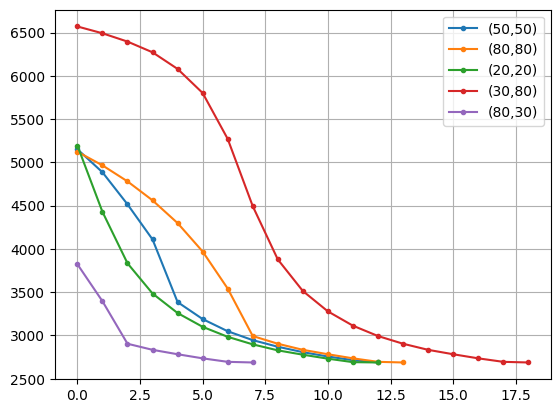

In [74]:
{# # Making plot of objective values as a function of number of iterations

# # plt.plot(objective_vals, '.-', label = "1")
# # plt.plot(objective_vals2, '.-', label = "2")
# # plt.plot(objective_vals3, '.-', label = "3")
# # plt.plot(objective_vals4, '.-', label = "4")
# plt.plot(objective_vals5, '.-', label = "(80,10)")
# plt.plot(objective_vals6, '.-', label = "(80,20)")
# plt.plot(objective_vals7, '.-', label = "(80,80)")
# plt.plot(objective_vals8, '.-', label = "(50,50)")
# plt.plot(objective_vals9, '.-', label = "(30,30)")

# boundary_reached = False
# for i, val in enumerate(parameters5):
#     if val[-1] == 10.0 and not boundary_reached:
#         plt.plot(i, objective_vals5[i], 'r*')
#         boundary_reached = True

# boundary_reached = False
# for i, val in enumerate(parameters6):
#     if val[-1] == 10.0 and not boundary_reached:
#         plt.plot(i, objective_vals6[i], 'r*')
#         boundary_reached = True


# boundary_reached = False
# for i, val in enumerate(parameters7):
#     if val[-1] == 10.0 and not boundary_reached:
#         plt.plot(i, objective_vals7[i], 'r*')
#         boundary_reached = True


# boundary_reached = False
# for i, val in enumerate(parameters8):
#     if val[-1] == 10.0 and not boundary_reached:
#         plt.plot(i, objective_vals8[i], 'r*')
#         boundary_reached = True

# boundary_reached = False
# for i, val in enumerate(parameters9):
#     if val[-1] == 10.0 and not boundary_reached:
#         plt.plot(i, objective_vals9[i], 'r*')
#         boundary_reached = True
# plt.legend()
# plt.grid()
# plt.show()

# # Stops improving when boundary is reached
}
plt.plot(objective_vals, '.-', label="(50,50)")
plt.plot(objective_vals1, '.-', label="(80,80)")
plt.plot(objective_vals2, '.-', label="(20,20)")
plt.plot(objective_vals3, '.-', label="(30,80)")
plt.plot(objective_vals4, '.-', label="(80,30)")


plt.legend()
plt.grid()
# plt.show()
tikzplotlib.save("../figurer/1-1_trafficlight/convergence_optimization.tex")

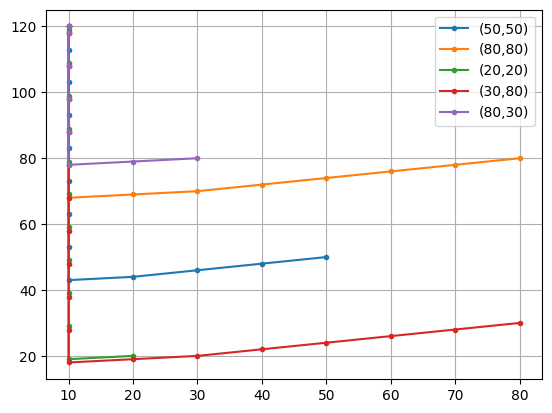

In [75]:
# Make plot of optimization path
{
# # plt.plot([p[-1] for p in parameters], [p[-2] for p in parameters], '.-')
# # plt.plot([p[-1] for p in parameters2], [p[-2] for p in parameters2], '.-')
# # plt.plot([p[-1] for p in parameters3], [p[-2] for p in parameters3], '.-')
# # plt.plot([p[-1] for p in parameters4], [p[-2] for p in parameters4], '.-')
# plt.plot([p[-1] for p in parameters5], [p[-2] for p in parameters5], '.-')
# plt.plot([p[-1] for p in parameters6], [p[-2] for p in parameters6], '.-')
# plt.plot([p[-1] for p in parameters7], [p[-2] for p in parameters7], '.-')
# plt.plot([p[-1] for p in parameters8], [p[-2] for p in parameters8], '.-')
# plt.plot([p[-1] for p in parameters9], [p[-2] for p in parameters9], '.-')
}

plt.plot([p[-1] for p in parameters], [p[-2] for p in parameters], '.-', label="(50,50)")
plt.plot([p[-1] for p in parameters1], [p[-2] for p in parameters1], '.-',  label="(80,80)")
plt.plot([p[-1] for p in parameters2], [p[-2] for p in parameters2], '.-',  label="(20,20)")
plt.plot([p[-1] for p in parameters3], [p[-2] for p in parameters3], '.-',  label="(30,80)")
plt.plot([p[-1] for p in parameters4], [p[-2] for p in parameters4], '.-',  label="(80,30)")



plt.legend()
plt.grid()
# plt.show()
tikzplotlib.save("../figurer/1-1_trafficlight/path_to_optimal.tex")


## 1-1 constant speeds

#### Creating plots for 1-1 network with no traffic light and constant speed limits - density on road is set to 0.8 at start, so this could imitate the case where a congested road is clearing up

In [5]:
# Starting speeds (50, 50)
speeds = [torch.tensor([ 50.,  50., 100., 100.]), torch.tensor([ 47.,  60., 100., 100.]), 
          torch.tensor([ 42.,  70., 100., 100.]), torch.tensor([ 42.,  80., 100., 100.])]

objectives = [torch.tensor(2635.8479), torch.tensor(2448.4617), torch.tensor(2252.3066), 
              torch.tensor(2079.7515)]

# Starting at (30,30)
speeds1 = [torch.tensor([ 30.,  30., 100., 100.]), torch.tensor([ 30.,  40., 100., 100.]), 
           torch.tensor([ 30.,  50., 100., 100.]), torch.tensor([ 30.,  60., 100., 100.]), 
           torch.tensor([ 40.,  61., 100., 100.]), torch.tensor([ 40.,  71., 100., 100.]), 
           torch.tensor([ 40.,  80., 100., 100.]), torch.tensor([ 42.,  80., 100., 100.])]

objectives1 = [torch.tensor(2990.4990), torch.tensor(2813.1689), torch.tensor(2636.1960), 
               torch.tensor(2465.0596), torch.tensor(2419.0974), torch.tensor(2238.6958), 
               torch.tensor(2083.8557), torch.tensor(2079.7515)]

# Starting at (60, 60)
speeds2 = [torch.tensor([ 60.,  60., 100., 100.]), torch.tensor([ 56.,  70., 100., 100.]), 
           torch.tensor([ 66.,  79., 100., 100.]), torch.tensor([ 63.,  80., 100., 100.]), 
           torch.tensor([ 53.,  80., 100., 100.]), torch.tensor([ 43.,  80., 100., 100.]), 
           torch.tensor([ 40.,  80., 100., 100.]), torch.tensor([ 42.,  80., 100., 100.])]

objectives2 = [torch.tensor(2530.7605), torch.tensor(2360.1335), torch.tensor(2188.0671), 
               torch.tensor(2179.1079), torch.tensor(2155.5657), torch.tensor(2084.2456), 
               torch.tensor(2083.8557), torch.tensor(2079.7515)]

# Starting at (70,40)
speeds3 = [torch.tensor([ 70.,  40., 100., 100.]), torch.tensor([ 67.,  50., 100., 100.]), 
           torch.tensor([ 64.,  60., 100., 100.]), torch.tensor([ 59.,  70., 100., 100.]), 
           torch.tensor([ 52.,  80., 100., 100.]), torch.tensor([ 42.,  80., 100., 100.])]

objectives3 = [torch.tensor(2892.5149), torch.tensor(2713.9673), torch.tensor(2548.8103), 
               torch.tensor(2368.0403), torch.tensor(2148.7327), torch.tensor(2079.7515)]

# Starting at (40,70)
speeds4 = [torch.tensor([ 40.,  70., 100., 100.]), torch.tensor([ 40.,  80., 100., 100.]), 
           torch.tensor([ 42.,  80., 100., 100.])]

objectives4 = [torch.tensor(2256.5698), torch.tensor(2083.8557), torch.tensor(2079.7515)]

# Starting at (70, 70)
speeds5 = []
objectives5 = []


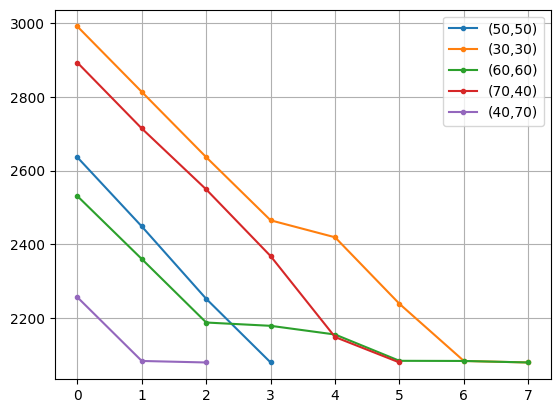

In [19]:
plt.plot(objectives, '.-', label="(50,50)")
plt.plot(objectives1, '.-', label="(30,30)")
plt.plot(objectives2, '.-', label="(60,60)")
plt.plot(objectives3, '.-', label="(70,40)")
plt.plot(objectives4, '.-', label="(40,70)")

# plt.plot(objectives4, '.-', label="(80,30)")


plt.legend()
plt.grid()
# plt.show()
tikzplotlib.save("../figurer/1-1_constant_speed/convergence_optimization.tex")

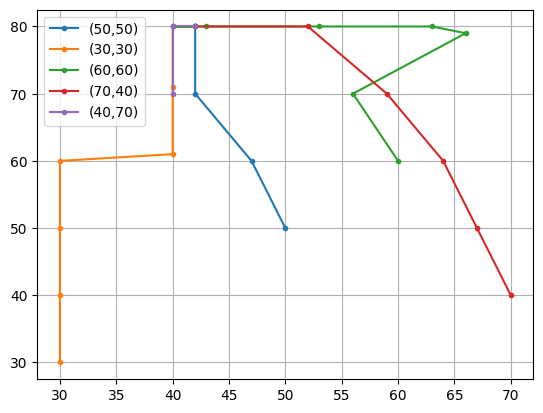

In [20]:
plt.plot([p[0] for p in speeds], [p[1] for p in speeds], '.-', label="(50,50)")
plt.plot([p[0] for p in speeds1], [p[1] for p in speeds1], '.-',  label="(30,30)")
plt.plot([p[0] for p in speeds2], [p[1] for p in speeds2], '.-',  label="(60,60)")
plt.plot([p[0] for p in speeds3], [p[1] for p in speeds3], '.-',  label="(70,40)")
plt.plot([p[0] for p in speeds4], [p[1] for p in speeds4], '.-',  label="(40,70)")



plt.legend()
plt.grid()
# plt.show()
tikzplotlib.save("../figurer/1-1_constant_speed/path_to_optimal.tex")

## 1-1 variable speeds

In [3]:
# Only one control point at 500
one_objectives = [torch.tensor(2125.6223), torch.tensor(2108.6326), torch.tensor(2090.4827), 
                  torch.tensor(2075.1536), torch.tensor(2064.2275)]
one_params = [torch.tensor([ 50.,  70.,  80.,  80., 100., 100.]), 
              torch.tensor([ 48.0000,  70.0316,  80.0000,  80.0000, 100.0000, 100.0000]), 
              torch.tensor([ 46.0000,  70.0476,  80.0000,  80.0000, 100.0000, 100.0000]), 
              torch.tensor([ 44.0000,  70.0657,  80.0000,  80.0000, 100.0000, 100.0000]), 
              torch.tensor([ 42.0000,  70.1003,  80.0000,  80.0000, 100.0000, 100.0000])]

one_objectives1 = [torch.tensor(2122.6577), torch.tensor(2105.9023), torch.tensor(2087.8870), 
                   torch.tensor(2072.5151), torch.tensor(2061.5388)]
one_params1 = [torch.tensor([ 50.,  80.,  80.,  80., 100., 100.]), torch.tensor([ 48.,  80.,  80.,  80., 100., 100.]), 
               torch.tensor([ 46.,  80.,  80.,  80., 100., 100.]), torch.tensor([ 44.,  80.,  80.,  80., 100., 100.]), 
               torch.tensor([ 42.,  80.,  80.,  80., 100., 100.])]

# Three control points at 250, 500, 750
three_objectives = [torch.tensor(2122.6594), torch.tensor(2104.8323), torch.tensor(2085.6277), 
                    torch.tensor(2068.7766), torch.tensor(2056.0269)]
three_params = [torch.tensor([ 50.,  50.,  80.,  80.,  80.,  80.,  80.,  80., 100., 100.]), 
                torch.tensor([ 48.,  50.0411,  80.0,  80.0,  80.0,  80.0,  80.0, 80.0, 100., 100.]), 
                torch.tensor([ 46.,  50.0194,  80.0,  80.0,  80.0,  80.0,  80.0, 80.0, 100., 100.]), 
                torch.tensor([ 44.,  50.0218,  80.0,  80.0,  80.0,  80.0,  80.0, 80.0, 100., 100.]), 
                torch.tensor([ 42.0000,  49.9875,  80.0,  80.0,  80.0,  80.0,  80.0, 80.0000, 100., 100.])]

three_objectives1 = [torch.tensor(2635.8335), torch.tensor(2480.9712), torch.tensor(2360.1277), 
                     torch.tensor(2225.0579), torch.tensor(2223.8953), torch.tensor(2155.5532), 
                     torch.tensor(2132.9248), torch.tensor(2104.9524), torch.tensor(2087.3191), 
                     torch.tensor(2076.0505), torch.tensor(2064.4834)]
three_params1 = [torch.tensor([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50., 100., 100.]), 
                 torch.tensor([ 44.,  50.,  50.,  50.,  60.,  56.,  52.,  51., 100., 100.]), 
                 torch.tensor([ 44.,  50.,  50.,  50.,  70.,  62.,  54.,  52., 100., 100.]), 
                 torch.tensor([ 40.,  49.,  50.,  50.,  80.,  68.,  56.,  52., 100., 100.]), 
                 torch.tensor([ 41.,  48.,  50.,  50.,  80.,  68.,  56.,  52., 100., 100.]), 
                 torch.tensor([ 42.,  48.,  50.,  50.,  80.,  78.,  60.,  53., 100., 100.]), 
                 torch.tensor([ 42.,  47.,  50.,  50.,  80.,  80.,  64.,  54., 100., 100.]), 
                 torch.tensor([ 42.,  47.,  50.,  50.,  80.,  80.,  74.,  57., 100., 100.]), 
                 torch.tensor([ 42.,  47.,  50.,  50.,  80.,  80.,  80.,  60., 100., 100.]), 
                 torch.tensor([ 42.,  49.,  52.,  51.,  80.,  80.,  80.,  70., 100., 100.]), 
                 torch.tensor([ 41.,  46.,  54.,  52.,  80.,  80.,  80.,  80., 100., 100.])]


three_objectives2 = [torch.tensor(2360.6130), torch.tensor(2236.7222), torch.tensor(2197.4299), 
                     torch.tensor(2138.6348), torch.tensor(2087.3225), torch.tensor(2085.1152), 
                     torch.tensor(2076.5422), torch.tensor(2074.4875), torch.tensor(2058.8120), 
                     torch.tensor(2058.1045)]
three_params2 = [torch.tensor([ 70.,  70.,  70.,  70.,  70.,  70.,  70.,  70., 100., 100.]), 
                 torch.tensor([ 68.,  70.,  70.,  70.,  80.,  72.,  71.,  70., 100., 100.]), 
                 torch.tensor([ 60.,  70.,  70.,  70.,  80.,  80.,  75.,  71., 100., 100.]), 
                 torch.tensor([ 50.,  70.,  70.,  70.,  80.,  80.,  76.,  71., 100., 100.]), 
                 torch.tensor([ 40.,  70.,  70.,  70.,  80.,  80.,  78.,  71., 100., 100.]), 
                 torch.tensor([ 42.,  69.,  70.,  70.,  80.,  80.,  78.,  71., 100., 100.]), 
                 torch.tensor([ 39.,  59.,  70.,  70.,  80.,  80.,  80.,  74., 100., 100.]), 
                 torch.tensor([ 44.,  58.,  70.,  70.,  80.,  80.,  80.,  74., 100., 100.]), 
                 torch.tensor([ 41.,  57.,  70.,  70.,  80.,  80.,  80.,  74., 100., 100.]), 
                 torch.tensor([ 41.,  56.,  70.,  70.,  80.,  80.,  80.,  75., 100., 100.])]

three_objectives3 = [torch.tensor(2359.0261), torch.tensor(2235.3445), torch.tensor(2115.5938), 
                     torch.tensor(2113.8926), torch.tensor(2081.5591), torch.tensor(2059.6943)]
three_params3 = [torch.tensor([ 40.,  40.,  60.,  60.,  60.,  60.,  80.,  80., 100., 100.]), 
                 torch.tensor([ 40.,  40.,  60.,  60.,  70.,  66.,  80.,  80., 100., 100.]), 
                 torch.tensor([ 40.,  39.,  60.,  60.,  80.,  72.,  80.,  80., 100., 100.]), 
                 torch.tensor([ 41.,  39.,  60.,  60.,  80.,  72.,  80.,  80., 100., 100.]), 
                 torch.tensor([ 42.,  39.,  60.,  60.,  80.,  80.,  80.,  80., 100., 100.]), 
                 torch.tensor([ 41.,  49.,  60.,  60.,  80.,  80.,  80.,  80., 100., 100.])]

three_objectives4 = [torch.tensor(2080.0249), torch.tensor(2065.6724), torch.tensor(2055.9128), 
                     torch.tensor(2055.4600)]
three_params4 = [torch.tensor([ 45.,  45.,  80.,  80.,  80.,  80.,  80.,  80., 100., 100.]), 
                 torch.tensor([ 43.0,  45.0065,  80.0,  80.0,  80.0,  80.0,  80.0, 80.0, 100.0, 100.0]), 
                 torch.tensor([ 41.0,  44.9477,  80.0,  80.0,  80.0,  80.0,  80.0, 80.0, 100.0, 100.0]), 
                 torch.tensor([ 41.5,  44.9340,  80.0,  80.0,  80.0,  80.0,  80.0,80.0, 100.0, 100.0])]

three_objectives5 = [torch.tensor(2122.6594), torch.tensor(2104.8323), torch.tensor(2085.6277), 
                     torch.tensor(2068.7766), torch.tensor(2056.0269)]
three_params5 = [torch.tensor([ 50.,  50.,  80.,  80.,  80.,  80.,  80.,  80., 100., 100.]), 
                 torch.tensor([ 48.0,  50.0411,  80.0,  80.0,  80.0,  80.0,  80.0, 80.0, 100.0, 100.0]), 
                 torch.tensor([ 46.0,  50.0194,  80.0,  80.0,  80.0,  80.0,  80.0, 80.0, 100.0, 100.0]), 
                 torch.tensor([ 44.0,  50.0218,  80.0,  80.0,  80.0,  80.0,  80.0, 80.0, 100.0, 100.0]), 
                 torch.tensor([ 42.0,  49.9875,  80.0,  80.0,  80.0,  80.0,  80.0, 80.0, 100.0, 100.0])]

three_objectives6 = [torch.tensor(2122.6594), torch.tensor(2104.8562), torch.tensor(2086.1387), 
                     torch.tensor(2069.8394), torch.tensor(2057.9321), torch.tensor(2056.7651), 
                     torch.tensor(2054.7258)]
three_params6 = [torch.tensor([ 50.,  50.,  80.,  80.,  80.,  80.,  80.,  80., 100., 100.]), 
                 torch.tensor([ 48.,  50.,  80.,  80.,  80.,  80.,  80.,  80., 100., 100.]), 
                 torch.tensor([ 46.,  49.,  80.,  80.,  80.,  80.,  80.,  80., 100., 100.]), 
                 torch.tensor([ 44.,  48.,  80.,  80.,  80.,  80.,  80.,  80., 100., 100.]), 
                 torch.tensor([ 42.,  47.,  79.,  80.,  80.,  80.,  80.,  80., 100., 100.]), 
                 torch.tensor([ 42.,  49.,  79.,  80.,  80.,  80.,  80.,  80., 100., 100.]), 
                 torch.tensor([ 41.,  47.,  79.,  80.,  80.,  80.,  80.,  80., 100., 100.])]

# Control points at 125, 250, 375, 500, 625, 750, 875
seven_objectives = [torch.tensor(2122.6345), torch.tensor(2105.7432), torch.tensor(2089.4978), 
                    torch.tensor(2076.8154), torch.tensor(2067.4199), torch.tensor(2055.7173)]

seven_params = [torch.tensor([ 50.,  50.,  50.,  50.,  80.,  80.,  80.,  80.,  
                        80.,  80.,  80.,  80., 80.,  80.,  80.,  80., 100., 100.]), 
                torch.tensor([ 48.0,  49.0283,  50.0566,  49.9990,  80.0,  80.0,  80.0, 80.0,  
                        80.0,  80.0,  80.0,  80.0,  80.0,  80.0, 80.0,  80.0, 100.0, 100.0]), 
                torch.tensor([ 46.0,  48.0485,  50.0248,  49.9783,  80.0,  80.0,  80.0, 80.0,  
                        80.0,  80.0,  80.0,  80.0,  80.0,  80.0, 80.0,  80.0, 100.0, 100.0]), 
                torch.tensor([ 44.0,  46.8945,  50.0102,  49.9610,  80.0,  80.0,  80.0, 80.0,  
                        80.0,  80.0,  80.0,  80.0,  80.0,  80.0,80.0,  80.0, 100.0, 100.0]), 
                torch.tensor([ 42.8353,  44.8945,  50.0127,  49.9388,  80.0,  80.0,  80.0, 80.0,  
                        80.0,  80.0,  80.0,  80.0,  80.0,  80.0,80.0,  80.0, 100.0, 100.0]), 
                torch.tensor([ 40.8353,  43.0392,  49.9599,  49.8818,  80.0,  80.0,  80.0, 80.0,  
                        80.0,  80.0,  80.0,  80.0,  80.0,  80.0,80.0,  80.0, 100.0, 100.0]), 
                torch.tensor([ 40.9603,  42.9973,  49.9886,  49.8777,  80.0,  80.0,  80.0, 80.0,  
                        80.0,  80.0,  80.0,  80.0,  80.0,  80.0,80.0,  80.0, 100.0, 100.0])]

seven_objectives1 = [torch.tensor(2122.6345), torch.tensor(2105.9028), torch.tensor(2090.2388), 
                     torch.tensor(2075.9326), torch.tensor(2068.4072), torch.tensor(2054.6716)]
seven_params1 = [torch.tensor([ 50.,  50.,  50.,  50.,  80.,  80.,  80.,  80.,  80., 
                               80., 80.,  80., 80.,  80.,  80.,  80., 100., 100.]), 
                torch.tensor([ 48.,  49.,  50.,  49.,  80.,  80.,  80.,  80.,  80., 
                              80., 80.,  80., 80.,  80.,  80.,  80., 100., 100.]), 
                torch.tensor([ 46.,  48.,  49.,  48.,  79.,  80.,  80.,  80.,  80., 
                              80., 80.,  80., 80.,  80.,  80.,  80., 100., 100.]), 
                torch.tensor([ 44.,  46.,  49.,  47.,  78.,  80.,  80.,  80.,  80., 
                              80., 80.,  80., 80.,  80.,  80.,  80., 100., 100.]), 
                torch.tensor([ 43.,  44.,  48.,  46.,  77.,  80.,  80.,  80.,  80., 
                              80., 80.,  80., 80.,  80.,  80.,  80., 100., 100.]), 
                torch.tensor([ 41.,  42.,  48.,  46.,  77.,  80.,  80.,  80.,  80., 
                              80., 80.,  80., 80.,  80.,  80.,  80., 100., 100.]), 
                torch.tensor([ 41.,  42.,  48.,  46.,  77.,  80.,  80.,  80.,  80., 
                              80., 80.,  80., 80.,  80.,  80.,  80., 100., 100.])]

seven_objectives2 = [torch.tensor(2054.7275), torch.tensor(2054.4238)]
seven_params2 = [torch.tensor([ 41.,  41.,  47.,  47.,  79.,  79.,  80.,  80.,  80.,  80.,  
                         80.,  80., 80.,  80.,  80.,  80., 100., 100.]), 
                 torch.tensor([ 43.,  40.,  47.,  46.,  79.,  79.,  80.,  80.,  80.,  80.,  
                         80.,  80., 80.,  80.,  80.,  80., 100., 100.])]

# Do integer optimization once more for three parameters starting from 50, 50, 80, 80, 80, 80, 80, 80

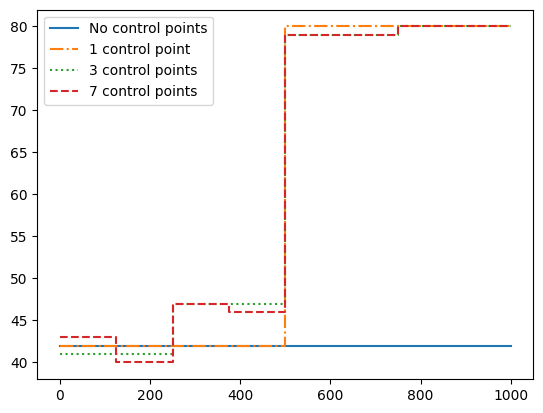

In [7]:
# Visualize the speed on each road for the optimal solution
fig = plt.figure()

# No control point
# Optimal parameters in speeds, objective value = 2079.7515
# speeds = [torch.tensor([ 50.,  50., 100., 100.]), torch.tensor([ 47.,  60., 100., 100.]),
#           torch.tensor([ 42.,  70., 100., 100.]), torch.tensor([ 42.,  80., 100., 100.])]
plt.plot([0, 1000], [speeds[-1][0], speeds[-1][0]], label = "No control points")

# One control point at 500
# Optimal parameters in one_params1, objective values = 2061.5388
plt.plot([0, 500, 500, 1000], [one_params1[-1][0], one_params1[-1][0], one_params1[-1][1], one_params1[-1][1]],
         label = "1 control point", linestyle = "dashdot")

# Three control points at 250, 500, 750
# Optimal parameters in three_params6, objective value = 2054.7258
plt.plot([0, 250, 250, 500, 500, 750, 750, 1000],
         [three_params6[-1][0], three_params6[-1][0], three_params6[-1][1], three_params6[-1][1],
          three_params6[-1][2], three_params6[-1][2], three_params6[-1][3], three_params6[-1][3]],
         label = "3 control points", linestyle = "dotted")


# Seven control points at 125, 250, 375, 500, 625, 750, 875
# Optimal parameters in seven_params2, objective value = 2054.4238
plt.plot([0, 125, 125, 250, 250, 375, 375, 500, 500, 625, 625, 750, 750, 875, 875, 1000],
         [seven_params2[-1][0], seven_params2[-1][0], seven_params2[-1][1], seven_params2[-1][1],
          seven_params2[-1][2], seven_params2[-1][2], seven_params2[-1][3], seven_params2[-1][3],
          seven_params2[-1][4], seven_params2[-1][4], seven_params2[-1][5], seven_params2[-1][5],
          seven_params2[-1][6], seven_params2[-1][6], seven_params2[-1][7], seven_params2[-1][7]],
         label = "7 control points", linestyle = "dashed")

plt.legend()
# plt.show()
tikzplotlib.save("../figurer/1-1_variable/speed_limits.tex")


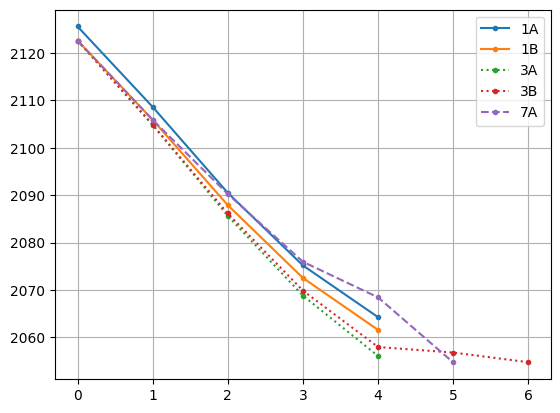

In [78]:
# Also plot of convergence for some starting points

plt.plot(one_objectives, '.-', label = "1A")
plt.plot(one_objectives1, '.-', label = "1B")
plt.plot(three_objectives, '.', linestyle="dotted", label = "3A")
plt.plot(three_objectives6, '.', linestyle="dotted", label = "3B")
plt.plot(seven_objectives1, '.--', label = "7A")
plt.grid()
plt.legend()
# plt.show()
tikzplotlib.save("../figurer/1-1_variable/convergence_all.tex")


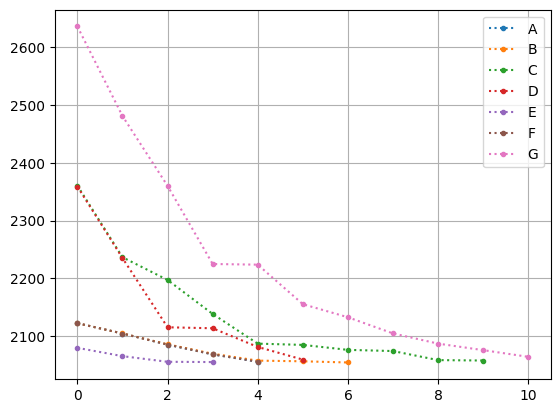

In [34]:
# Only for three control points
plt.plot(three_objectives, '.', linestyle="dotted", label = "A")
plt.plot(three_objectives6, '.', linestyle="dotted", label = "B")
plt.plot(three_objectives2, '.', linestyle="dotted", label = "C")
plt.plot(three_objectives3, '.', linestyle="dotted", label = "D")
plt.plot(three_objectives4, '.', linestyle="dotted", label = "E")
plt.plot(three_objectives5, '.', linestyle="dotted", label = "F")
plt.plot(three_objectives1, '.', linestyle="dotted", label = "G")

plt.grid()
plt.legend()
# plt.show()
tikzplotlib.save("../figurer/1-1_variable/convergence_three.tex")

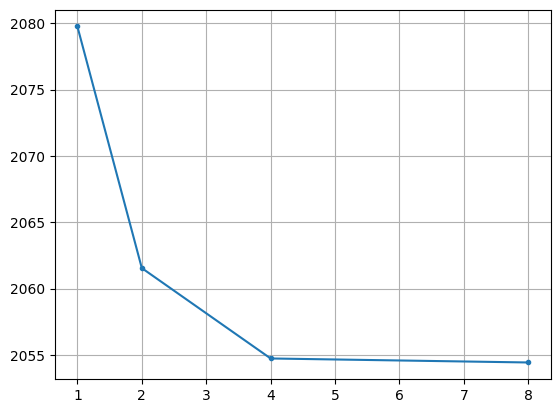

In [75]:
plt.plot([1, 2, 4, 8], [objectives[-1], one_objectives1[-1], three_objectives6[-1], seven_objectives2[-1]], '.-')
plt.grid()
# plt.show()
tikzplotlib.save("../figurer/1-1_variable/convergence_n_points.tex")

## 1-1 full

In [36]:
full_objectives = [torch.tensor(2635.8479), torch.tensor(2551.4192), torch.tensor(2461.2683), 
                    torch.tensor(2379.1624), torch.tensor(2299.4824), torch.tensor(2219.4229), 
                    torch.tensor(2141.5598), torch.tensor(2140.1509), torch.tensor(2107.9670), 
                    torch.tensor(2088.7822), torch.tensor(2080.5159), torch.tensor(2044.5667), 
                    torch.tensor(2023.1680), torch.tensor(2014.3513), torch.tensor(1971.6921), 
                    torch.tensor(1946.6769), torch.tensor(1935.7200), torch.tensor(1895.6945), 
                    torch.tensor(1872.0310), torch.tensor(1864.6549), torch.tensor(1835.2278), 
                    torch.tensor(1828.4391), torch.tensor(1797.8125), torch.tensor(1780.3489), 
                    torch.tensor(1746.1606), torch.tensor(1725.6295), torch.tensor(1698.0126), 
                    torch.tensor(1679.8759), torch.tensor(1667.1810), torch.tensor(1648.4254), 
                    torch.tensor(1642.3682), torch.tensor(1618.1317), torch.tensor(1603.4061), 
                    torch.tensor(1600.2588), torch.tensor(1596.4132), torch.tensor(1593.1055), 
                    torch.tensor(1592.7787), torch.tensor(1585.8842), torch.tensor(1585.7074), 
                    torch.tensor(1489.7913), torch.tensor(1478.8896), torch.tensor(1409.9001), 
                    torch.tensor(1396.9744), torch.tensor(1350.1444), torch.tensor(1345.7837), 
                    torch.tensor(1344.7015)]

full_parameters = [torch.tensor([ 50.,  50.,  50.,  50., 100., 100.]), 
                    torch.tensor([48., 50., 55., 51., 99., 99.]), torch.tensor([45., 50., 60., 52., 98., 98.]), 
                    torch.tensor([41., 50., 65., 53., 98., 97.]), torch.tensor([40., 50., 70., 54., 98., 96.]), 
                    torch.tensor([40., 50., 75., 55., 98., 95.]), torch.tensor([40., 50., 80., 56., 98., 94.]), 
                    torch.tensor([42., 49., 80., 56., 97., 93.]), torch.tensor([43., 49., 80., 61., 97., 89.]), 
                    torch.tensor([40., 49., 80., 63., 97., 87.]), torch.tensor([42., 49., 80., 63., 97., 86.]), 
                    torch.tensor([43., 49., 80., 68., 97., 82.]), torch.tensor([40., 49., 80., 70., 97., 80.]), 
                    torch.tensor([42., 49., 80., 70., 97., 79.]), torch.tensor([43., 49., 80., 75., 97., 75.]), 
                    torch.tensor([40., 49., 80., 77., 97., 73.]), torch.tensor([42., 49., 80., 77., 97., 72.]), 
                    torch.tensor([43., 49., 80., 80., 97., 68.]), torch.tensor([40., 49., 80., 80., 97., 65.]), 
                    torch.tensor([42., 49., 80., 80., 96., 64.]), torch.tensor([44., 49., 80., 80., 96., 59.]), 
                    torch.tensor([39., 49., 80., 80., 96., 55.]), torch.tensor([44., 49., 80., 80., 95., 54.]), 
                    torch.tensor([39., 49., 80., 80., 95., 49.]), torch.tensor([44., 49., 80., 80., 94., 48.]), 
                    torch.tensor([39., 49., 80., 80., 94., 43.]), torch.tensor([44., 49., 80., 80., 93., 42.]), 
                    torch.tensor([39., 48., 80., 80., 93., 37.]), torch.tensor([44., 47., 80., 80., 92., 36.]), 
                    torch.tensor([39., 45., 80., 80., 92., 33.]), torch.tensor([44., 44., 80., 80., 91., 32.]), 
                    torch.tensor([39., 42., 80., 80., 90., 29.]), torch.tensor([41., 41., 80., 80., 89., 28.]), 
                    torch.tensor([42., 40., 80., 80., 88., 27.]), torch.tensor([42., 39., 80., 80., 87., 26.]), 
                    torch.tensor([43., 40., 80., 80., 86., 21.]), torch.tensor([44., 39., 80., 80., 85., 20.]), 
                    torch.tensor([44., 38., 80., 80., 84., 19.]), torch.tensor([45., 37., 80., 80., 83., 18.]), 
                    torch.tensor([40., 38., 80., 80., 82., 16.]), torch.tensor([45., 39., 80., 80., 81., 15.]),
                    torch.tensor([40., 41., 80., 80., 81., 13.]), torch.tensor([45., 41., 80., 80., 80., 12.]), 
                    torch.tensor([40., 41., 80., 80., 80., 10.]), torch.tensor([45., 41., 80., 80., 80., 10.]), 
                    torch.tensor([43., 41., 80., 80., 80., 10.])]


full_objectives1 = [tensor(1456.6223), tensor(1375.8353), tensor(1337.6074), 
                    tensor(1319.6565), tensor(1290.3372), tensor(1275.4358), 
                    tensor(1272.8850), tensor(1272.7567), tensor(1270.7390), 
                    tensor(1269.6139)]

full_parameters1 = [tensor([ 50.,  70.,  80.,  80., 110.,  20.]), tensor([ 45.,  70.,  80.,  80., 110.,  17.]), 
                    tensor([ 40.,  70.,  80.,  80., 109.,  14.]), tensor([ 45.,  70.,  80.,  80., 109.,  13.]), 
                    tensor([ 40.,  70.,  80.,  80., 109.,  11.]), tensor([ 45.,  70.,  80.,  80., 109.,  10.]), 
                    tensor([ 42.,  70.,  80.,  80., 109.,  10.]), tensor([ 44.,  70.,  80.,  80., 109.,  10.]), 
                    tensor([ 41.,  70.,  80.,  80., 111.,  10.]), tensor([ 43.,  70.,  80.,  80., 111.,  10.])]


full_objectives2 = [tensor(1807.8038), tensor(1733.5525), tensor(1601.4258), 
                    tensor(1506.4402), tensor(1457.1427), tensor(1450.9763), 
                    tensor(1397.3717), tensor(1343.6772), tensor(1305.0646), 
                    tensor(1290.9863), tensor(1276.5992), tensor(1274.5162)]

full_parameters2 = [tensor([ 60.,  75.,  80.,  80., 115.,  30.]), tensor([ 55.,  74.,  80.,  80., 115.,  29.]), 
                    tensor([ 50.,  73.,  80.,  80., 115.,  27.]), tensor([ 45.,  73.,  80.,  80., 114.,  25.]), 
                    tensor([ 40.,  73.,  80.,  80., 113.,  23.]), tensor([ 42.,  73.,  80.,  80., 112.,  22.]), 
                    tensor([ 47.,  73.,  80.,  80., 111.,  18.]), tensor([ 42.,  73.,  80.,  80., 110.,  15.]), 
                    tensor([ 40.,  73.,  80.,  80., 109.,  12.]), tensor([ 45.,  73.,  80.,  80., 108.,  11.]), 
                    tensor([ 40.,  73.,  80.,  80., 108.,  10.]), tensor([ 42.,  73.,  80.,  80., 107.,  10.])]

full_objectives3 = [tensor(1427.0173), tensor(1358.2559), tensor(1335.0125), 
                    tensor(1327.3838), tensor(1301.3667), tensor(1297.9863), 
                    tensor(1273.0940), tensor(1269.7781), tensor(1255.8544), 
                    tensor(1255.1143), tensor(1254.0092), tensor(1253.8781),
                    tensor(1253.7894)]

full_parameters3 = [tensor([ 50.,  80.,  80.,  80., 120.,  20.]), 
                    tensor([ 45.0000,  80.0000,  80.0000,  80.0000, 119.9084,  17.4049]), 
                    tensor([ 40.0000,  80.0000,  80.0000,  80.0000, 119.8501,  15.6789]), 
                    tensor([ 45.0000,  80.0000,  80.0000,  80.0000, 119.8370,  15.0838]), 
                    tensor([ 40.0000,  80.0000,  80.0000,  80.0000, 120.0000,  13.4107]), 
                    tensor([ 45.0000,  80.0000,  80.0000,  80.0000, 120.0000,  12.9028]), 
                    tensor([ 40.0000,  80.0000,  80.0000,  80.0000, 120.0000,  11.3007]), 
                    tensor([ 45.0000,  80.0000,  80.0000,  80.0000, 120.0000,  10.7972]), 
                    tensor([ 40.,  80.,  80.,  80., 120.,  10.]), 
                    tensor([ 42.5000,  80.0000,  80.0000,  80.0000, 119.9883,  10.0000]), 
                    tensor([ 43.7500,  80.0000,  80.0000,  80.0000, 120.0000,  10.0000]), 
                    tensor([ 43.4375,  80.0000,  80.0000,  80.0000, 119.9962,  10.0000]),
                    tensor([ 43.1791,  80.0000,  80.0000,  80.0000, 120.0000,  10.0000])]


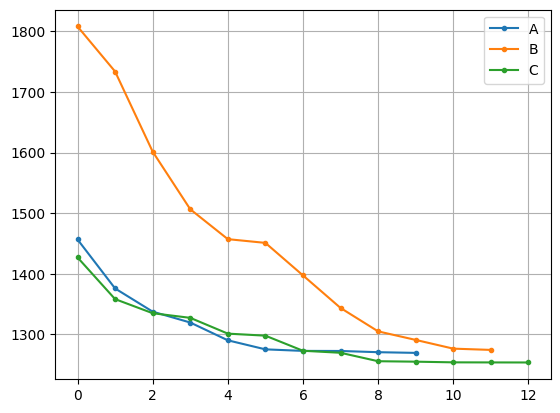

In [49]:
# plt.plot(full_objectives, '.-', label = "A")
plt.plot(full_objectives1, '.-', label = "A")
plt.plot(full_objectives2, '.-', label = "B")
plt.plot(full_objectives3, '.-', label = "C")
plt.grid()
plt.legend()
# plt.show()
tikzplotlib.save("../figurer/1-1_full/convergence.tex")

In [ ]:
# Plotting something here ...
plt.plot()

#### Network B
Find some interesting scenarios to look at here, two roads going in two roads going out
* A connected only to C and B connected only to D
* A has double capacity (and thus initial density) compared to C
* Optimize only cycle times of the coupled light

If optimization does not give obvious results, maybe try to change it...
First result indicate that gradient always points in the direction of increasing both lights
Is this correct? If it is, try to find a case where traffic builds up quick enough that 
at least one of the traffic lights have optimal solution inside domain

Again there is only two parameters, so we can visualize path

In [50]:
# Starting point (60, 60), expected solution (120, T), T < 120
# coupled_objectives = [tensor(4306.1113), tensor(4281.6309), tensor(4265.3994), tensor(4262.8237)]
# coupled_params = [tensor([50., 50., 50., 50., 60., 60.]), tensor([50., 50., 50., 50., 70., 64.]), 
#                   tensor([50., 50., 50., 50., 80., 68.]), tensor([50., 50., 50., 50., 85., 70.])]

# # Starting at (110, 110)
# coupled_objectives1 = [tensor(4309.5718), tensor(4309.2422)]
# coupled_params1 = [tensor([ 50.,  50.,  50.,  50., 110., 110.]), tensor([ 50.,  50.,  50.,  50., 120., 118.])]

# Again we only optimize two parameters, so we can visualize paths to optimal solution
# Behavious in this case is that the first parameter dominates until the boundary is reached
# At this point, the second parameter is being updated.

# Starting at (100, 40)
coupled_objectives = [tensor(1624.1332), tensor(1588.6455), tensor(1557.8221), 
                      tensor(1511.7443), tensor(1471.0986)]
coupled_params = [tensor([ 80.,  50.,  50.,  50., 100.,  40.]), tensor([ 80.,  50.,  50.,  50., 110.,  39.]), 
                  tensor([ 80.,  50.,  50.,  50., 120.,  38.]), tensor([ 80.,  50.,  50.,  50., 120.,  28.]),
                    tensor([ 80.,  50.,  50.,  50., 120.,  18.])]

# Starting at (120, 30) but forcing small updates:
coupled_objectives_small = [tensor(1520.2577), tensor(1516.1448), tensor(1511.7443), 
                             tensor(1506.9948), tensor(1502.1384), tensor(1496.9189), 
                             tensor(1492.0746), tensor(1486.9343), tensor(1481.5658), 
                             tensor(1476.3547), tensor(1470.9049), tensor(1467.2156)]
coupled_params_small = [tensor([ 80.,  50.,  50.,  50., 120.,  30.]), 
                        tensor([ 80.,  50.,  50.,  50., 120.,  29.]), 
                        tensor([ 80.,  50.,  50.,  50., 120.,  28.]), 
                        tensor([ 80.,  50.,  50.,  50., 120.,  27.]), 
                        tensor([ 80.,  50.,  50.,  50., 120.,  26.]), 
                        tensor([ 80.,  50.,  50.,  50., 120.,  25.]), 
                        tensor([ 80.,  50.,  50.,  50., 120.,  24.]), 
                        tensor([ 80.,  50.,  50.,  50., 120.,  23.]), 
                        tensor([ 80.,  50.,  50.,  50., 120.,  22.]), 
                        tensor([ 80.,  50.,  50.,  50., 120.,  21.]), 
                        tensor([ 80.,  50.,  50.,  50., 120.,  20.]), 
                        tensor([ 80.,  50.,  50.,  50., 120.,  19.])]

# Starting at (60, 60)
coupled_objectives1 = [tensor(1866.9807), tensor(1817.9973), tensor(1771.2019), 
                       tensor(1726.2196), tensor(1686.5530), tensor(1651.1245), 
                       tensor(1616.9141), tensor(1583.2815), tensor(1539.5857), 
                       tensor(1492.0746), tensor(1467.2156)]

coupled_params1 = [tensor([80., 50., 50., 50., 60., 60.]), tensor([80., 50., 50., 50., 70., 59.]), 
                   tensor([80., 50., 50., 50., 80., 58.]), tensor([80., 50., 50., 50., 90., 57.]), 
                   tensor([ 80.,  50.,  50.,  50., 100.,  56.]), tensor([ 80.,  50.,  50.,  50., 110.,  55.]), 
                   tensor([ 80.,  50.,  50.,  50., 120.,  54.]), tensor([ 80.,  50.,  50.,  50., 120.,  44.]), 
                   tensor([ 80.,  50.,  50.,  50., 120.,  34.]), tensor([ 80.,  50.,  50.,  50., 120.,  24.]), 
                   tensor([ 80.,  50.,  50.,  50., 120.,  19.])]

# Starting at (40, 40)
coupled_objectives2 = [tensor(1884.0839), tensor(1824.5630), tensor(1775.8019), 
                       tensor(1726.7230), tensor(1679.4070), tensor(1637.8444), 
                       tensor(1600.4419), tensor(1565.0388), tensor(1534.4696), 
                       tensor(1486.9343), tensor(1471.0986)]

coupled_params2 = [tensor([80., 50., 50., 50., 40., 40.]), tensor([80., 50., 50., 50., 50., 39.]), 
                  tensor([80., 50., 50., 50., 60., 39.]), tensor([80., 50., 50., 50., 70., 38.]), 
                  tensor([80., 50., 50., 50., 80., 37.]), tensor([80., 50., 50., 50., 90., 36.]), 
                  tensor([ 80.,  50.,  50.,  50., 100.,  35.]), tensor([ 80.,  50.,  50.,  50., 110.,  34.]), 
                  tensor([ 80.,  50.,  50.,  50., 120.,  33.]), tensor([ 80.,  50.,  50.,  50., 120.,  23.]), 
                  tensor([ 80.,  50.,  50.,  50., 120.,  18.])]

# Starting at (90, 90)
coupled_objectives3 = [tensor(1831.7666), tensor(1789.9060), tensor(1750.9357), 
                       tensor(1715.5626), tensor(1686.8551), tensor(1667.3518), 
                       tensor(1627.5308), tensor(1590.9491), tensor(1553.2920), 
                       tensor(1506.9948), tensor(1472.3140)]

coupled_params3 = [tensor([80., 50., 50., 50., 90., 90.]), tensor([ 80.,  50.,  50.,  50., 100.,  89.]), 
                   tensor([ 80.,  50.,  50.,  50., 110.,  88.]), tensor([ 80.,  50.,  50.,  50., 120.,  87.]), 
                   tensor([ 80.,  50.,  50.,  50., 120.,  77.]), tensor([ 80.,  50.,  50.,  50., 120.,  67.]), 
                   tensor([ 80.,  50.,  50.,  50., 120.,  57.]), tensor([ 80.,  50.,  50.,  50., 120.,  47.]), 
                   tensor([ 80.,  50.,  50.,  50., 120.,  37.]), tensor([ 80.,  50.,  50.,  50., 120.,  27.]), 
                   tensor([ 80.,  50.,  50.,  50., 120.,  17.])]




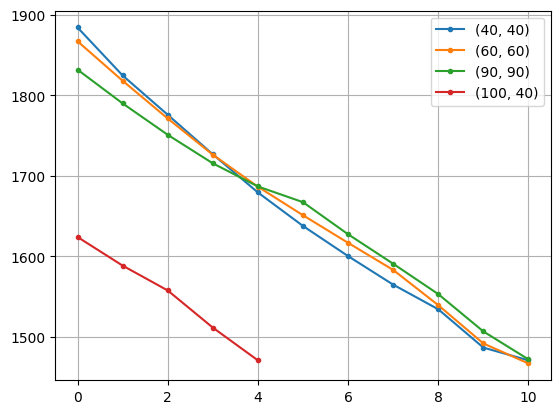

In [53]:
# Plot results here
fig = plt.figure()
plt.plot(coupled_objectives2, '.-', label = "(40, 40)")
plt.plot(coupled_objectives1, '.-', label = "(60, 60)")
plt.plot(coupled_objectives3, '.-', label = "(90, 90)")
plt.plot(coupled_objectives, '.-', label = "(100, 40)")
plt.grid()
plt.legend()
# plt.show()
tikzplotlib.save("../figurer/2-2coupled/convergence.tex")

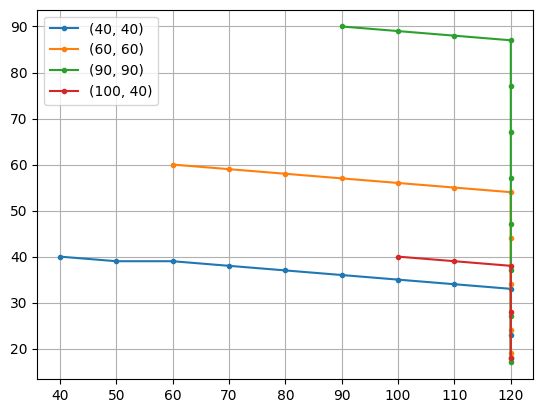

In [59]:
# plotting path to optimal
plt.plot([p[-2] for p in coupled_params2], [p[-1] for p in coupled_params2], '.-', label = "(40, 40)")
plt.plot([p[-2] for p in coupled_params1], [p[-1] for p in coupled_params1], '.-', label = "(60, 60)")
plt.plot([p[-2] for p in coupled_params3], [p[-1] for p in coupled_params3], '.-', label = "(90, 90)")
plt.plot([p[-2] for p in coupled_params], [p[-1] for p in coupled_params], '.-', label = "(100, 40)")
plt.grid()
plt.legend()
tikzplotlib.save("../figurer/2-2coupled/path.tex")

#### Coupled light + variable speed limits
Use similar network as before, but let inflow to the roads vary somewhat in time

For now we just use the same network as before, but we allow the speeds of the two incoming roads to vary with one control point.

Setting higher speed limit for the second road allows this flux to go through the traffic light faster, so that it can be kept green between the dominating road for longer - much better flow.

In [60]:
full_coupled_objectives = [tensor(1866.9792), tensor(1768.3948), tensor(1655.4058), 
                            tensor(1533.9915), tensor(1450.4265), tensor(1359.9648), 
                            tensor(1296.2161), tensor(1233.5735), tensor(1163.4779), 
                            tensor(1109.2649), tensor(1017.0024), tensor(988.1562), 
                            tensor(966.9496), tensor(945.1685), tensor(943.0056)]
full_coupled_params = [tensor([80., 80., 50., 50., 50., 50., 60., 60.]), 
                       tensor([80., 80., 60., 53., 50., 50., 62., 59.]), 
                       tensor([80., 78., 70., 57., 50., 50., 65., 58.]), 
                       tensor([80., 79., 80., 61., 50., 50., 69., 57.]), 
                       tensor([80., 80., 80., 71., 50., 50., 76., 56.]), 
                       tensor([80., 80., 80., 80., 50., 50., 83., 55.]), 
                       tensor([80., 80., 80., 80., 50., 50., 93., 54.]), 
                       tensor([ 80.,  80.,  80.,  80.,  50.,  50., 103.,  53.]), 
                       tensor([ 80.,  80.,  80.,  80.,  50.,  50., 113.,  52.]), 
                       tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  51.]), 
                       tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  41.]), 
                       tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  31.]), 
                       tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  21.]), 
                       tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  11.]), 
                       tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  10.])]

full_coupled_params1 = [tensor([60., 60., 60., 60., 50., 50., 90., 90.]), 
                            tensor([70., 61., 64., 61., 50., 50., 90., 89.]), 
                            tensor([80., 62., 68., 62., 50., 50., 91., 88.]), 
                            tensor([80., 64., 78., 65., 50., 50., 93., 87.]), 
                            tensor([80., 58., 80., 69., 50., 50., 95., 86.]), 
                            tensor([ 80.,  66.,  80.,  79.,  50.,  50., 101.,  85.]),
                            tensor([ 80.,  72.,  80.,  80.,  50.,  50., 106.,  84.]), 
                            tensor([ 80.,  80.,  80.,  80.,  50.,  50., 116.,  83.]), 
                            tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  82.]), 
                            tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  72.]), 
                            tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  62.]), 
                            tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  52.]), 
                            tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  42.]), 
                            tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  32.]), 
                            tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  22.]), 
                            tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  12.]), 
                            tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  10.])]
full_coupled_objectives1 = [tensor(2094.7844), tensor(1898.8237), tensor(1681.2339), 
                        tensor(1581.2404), tensor(1550.8728), tensor(1469.0901), 
                        tensor(1420.5969), tensor(1352.5323), tensor(1330.2854), 
                        tensor(1281.8347), tensor(1222.3513), tensor(1123.8444), 
                        tensor(1020.8125), tensor(990.4656), tensor(969.0649), 
                        tensor(947.5474), tensor(943.0056)]

full_coupled_objectives2 = [tensor(1826.1812), tensor(1619.0713), tensor(1508.7584), 
                            tensor(1399.2078), tensor(1302.5935), tensor(1210.4526), 
                            tensor(1102.5049), tensor(1008.6484), tensor(998.0385), 
                            tensor(989.9750), tensor(985.7504), tensor(964.9107), 
                            tensor(943.0056)]
full_coupled_params2 = [tensor([70., 70., 70., 70., 50., 50., 40., 40.]), 
                        tensor([80., 71., 75., 71., 50., 50., 42., 39.]), 
                        tensor([80., 73., 80., 74., 50., 50., 47., 38.]), 
                        tensor([80., 77., 80., 80., 50., 50., 57., 37.]), 
                        tensor([80., 79., 80., 80., 50., 50., 67., 36.]), 
                        tensor([80., 80., 80., 80., 50., 50., 77., 35.]), 
                        tensor([80., 80., 80., 80., 50., 50., 87., 34.]), 
                        tensor([80., 80., 80., 80., 50., 50., 97., 33.]), 
                        tensor([ 80.,  80.,  80.,  80.,  50.,  50., 107.,  32.]), 
                        tensor([ 80.,  80.,  80.,  80.,  50.,  50., 117.,  31.]), 
                        tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  30.]), 
                        tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  20.]), 
                        tensor([ 80.,  80.,  80.,  80.,  50.,  50., 120.,  10.])]

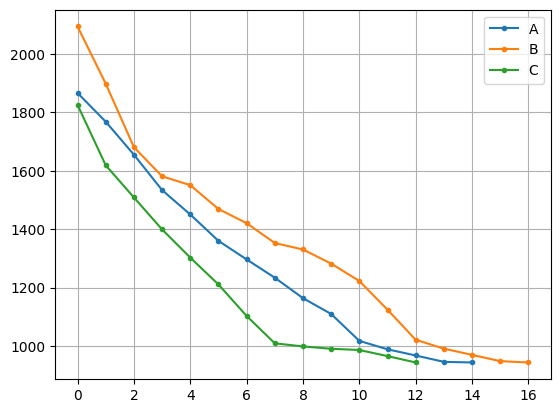

In [62]:
# Plot results here
plt.plot(full_coupled_objectives, '.-', label = "A")
plt.plot(full_coupled_objectives1, '.-', label = "B")
plt.plot(full_coupled_objectives2, '.-', label = "C")
plt.grid()
plt.legend()
# plt.show()
tikzplotlib.save("../figurer/2-2_full/convergence.tex")

### Network C
Finally we look at the most complex network
We immediately go to the case with two coupled traffic lights and variable speed limits
Decide on a case that shows something interesting

Let inflow vary in time to show gain of variable speed limits
Choose initial conditions so that there will be buildup of traffic for bad choices of parameters


In [63]:
# More or less random starting point
full_objectives = [tensor(14481.5840), tensor(13397.3525), tensor(13228.3369), 
                   tensor(12597.9678), tensor(12560.9766)]
full_params = [tensor([60., 60., 60., 60., 60., 60., 60., 60., 50., 50., 60., 60., 60., 60.]), 
               tensor([80., 60., 68., 61., 49., 57., 69., 67., 50., 50., 60., 61., 76., 73.]), 
               tensor([80., 59., 68., 61., 69., 55., 75., 69., 50., 50., 65., 60., 79., 78.]), 
               tensor([80., 55., 76., 61., 51., 50., 80., 79., 50., 50., 72., 62., 94., 98.]), 
               tensor([80., 49., 73., 60., 50., 60., 80., 80., 50., 50., 78., 61., 97., 103.]), 
               tensor([80., 49., 73., 60., 50., 60., 80., 80., 50., 50., 78., 61., 97., 103.])]

# Starting at what could potential be an optimum - does not appear to be

# Second potential optimum:

# New more or less arbitrary starting point

# Speed limits can not vary in time
full_objectives_const = [tensor(14481.8721), tensor(13784.9912), tensor(13541.3945), 
                         tensor(13512.1904), tensor(13304.9932), tensor(13208.7500), 
                         tensor(13056.1436), tensor(12961.8643)]
full_params_const = [tensor([60., 60., 60., 60., 50., 50., 60., 60., 60., 60.]), 
                     tensor([70., 64., 53., 67., 50., 50., 60., 60., 68., 66.]), 
                     tensor([80., 63., 51., 68., 50., 50., 62., 60., 69., 67.]), 
                     tensor([80., 61., 49., 69., 50., 50., 64., 59., 71., 67.]), 
                     tensor([80., 59., 59., 70., 50., 50., 65., 58., 72., 67.]), 
                     tensor([80., 53., 49., 80., 50., 50., 71., 56., 80., 73.]), 
                     tensor([80., 53., 59., 80., 50., 50., 71., 55., 81., 75.]), 
                     tensor([80., 62., 59., 80., 50., 50., 74., 56., 84., 85.])]

full_objectives_three = [[tensor(14481.5840), tensor(13791.2490), tensor(13619.8750), tensor(13497.2295), tensor(13450.1143), tensor(13303.7881), tensor(13246.4268), tensor(13228.7744), tensor(13228.7744)]
full_params_three = [tensor([60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
        60., 60., 50., 50., 60., 60., 60., 60.]), tensor([63., 68., 59., 60., 64., 60., 60., 60., 53., 60., 58., 59., 63., 61.,
        62., 61., 50., 50., 60., 61., 70., 68.]), tensor([64., 68., 58., 60., 59., 58., 59., 60., 50., 58., 57., 58., 65., 63.,
        63., 61., 50., 50., 59., 60., 75., 71.]), tensor([65., 70., 57., 60., 60., 57., 59., 60., 60., 55., 55., 57., 67., 65.,
        64., 61., 50., 50., 57., 60., 78., 74.]), tensor([68., 73., 54., 60., 60., 53., 59., 60., 60., 45., 54., 56., 71., 70.,
        65., 62., 50., 50., 52., 58., 86., 81.]), tensor([78., 73., 53., 60., 60., 53., 59., 60., 60., 47., 54., 56., 71., 70.,
        65., 62., 50., 50., 54., 58., 86., 82.]), tensor([80., 73., 52., 60., 61., 53., 58., 60., 60., 49., 54., 55., 71., 70.,
        65., 62., 50., 50., 56., 58., 86., 83.]), tensor([80., 73., 51., 60., 61., 53., 58., 60., 60., 50., 54., 54., 71., 70.,
        65., 62., 50., 50., 58., 58., 86., 84.]), tensor([80., 73., 51., 60., 61., 53., 58., 60., 60., 50., 54., 54., 71., 70.,
        65., 62., 50., 50., 58., 58., 86., 84.])]

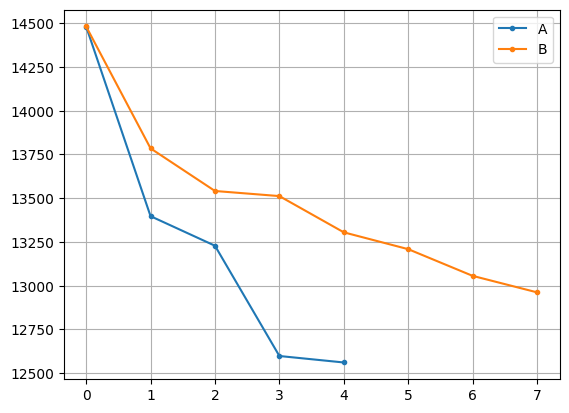

In [67]:
# Plot results here:
plt.plot(full_objectives, '.-', label = "A")
plt.plot(full_objectives_const, '.-', label = "B")
plt.grid()
plt.legend()
# plt.show()
tikzplotlib.save("../figurer/complex/convergence.tex")